# Importing Library:

In [92]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [93]:
# Pandas read_csv function used for reading the csv file.
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [94]:
# total no of rows and columns
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 32560
No of Columns: 15


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [95]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Statistical Analysis

In [96]:
# Duplicate entry or duplicate row with same value exist
df.duplicated().sum()

24

In [97]:
# Question mark preset inside dataset.(" ?")
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [98]:
# replace ' ?' with NaN
df=df.replace(' ?',np.NaN)

In [99]:
df.isin([' ','NA','-']).sum().any()

False

In [100]:
df.drop_duplicates(inplace=True)

In [101]:
df.shape

(32536, 15)

<AxesSubplot:>

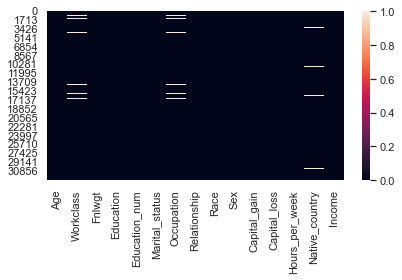

In [102]:
# checking the null values with heatmap
sns.heatmap(df.isnull())

Missing values in Occupation,workclass and Native country.

In [103]:
# percentage of data is missing 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Occupation                1843        5.664495
Workclass                 1836        5.642980
Native_country             582        1.788788
Age                          0        0.000000
Fnlwgt                       0        0.000000
Education                    0        0.000000
Education_num                0        0.000000
Marital_status               0        0.000000
Relationship                 0        0.000000
Race                         0        0.000000
Sex                          0        0.000000
Capital_gain                 0        0.000000
Capital_loss                 0        0.000000
Hours_per_week               0        0.000000
Income                       0        0.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [105]:
# Separating numerical and categorical variable
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

# Missing value imputation

In [106]:
# Imputating Missing value with mode for categorical features
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [107]:
# percentage of data is missing 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


No Missing Value is Present.

### Statistical Matrix

In [108]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

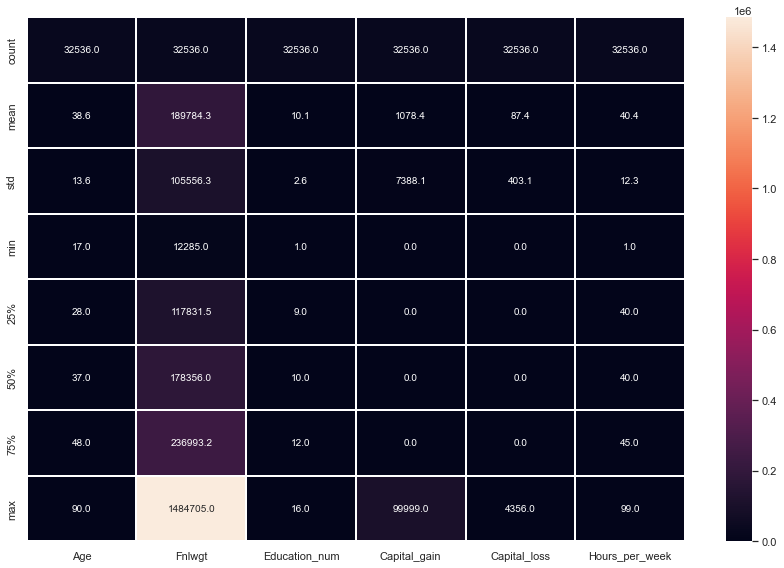

In [109]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.

While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.

The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.

he number of hours spent per week varies between 1 to 99 and the average being 40 hours.

### Exploring categorial features

In [110]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       5979
 Craft-repair         40

# Exploratory Data Analysis

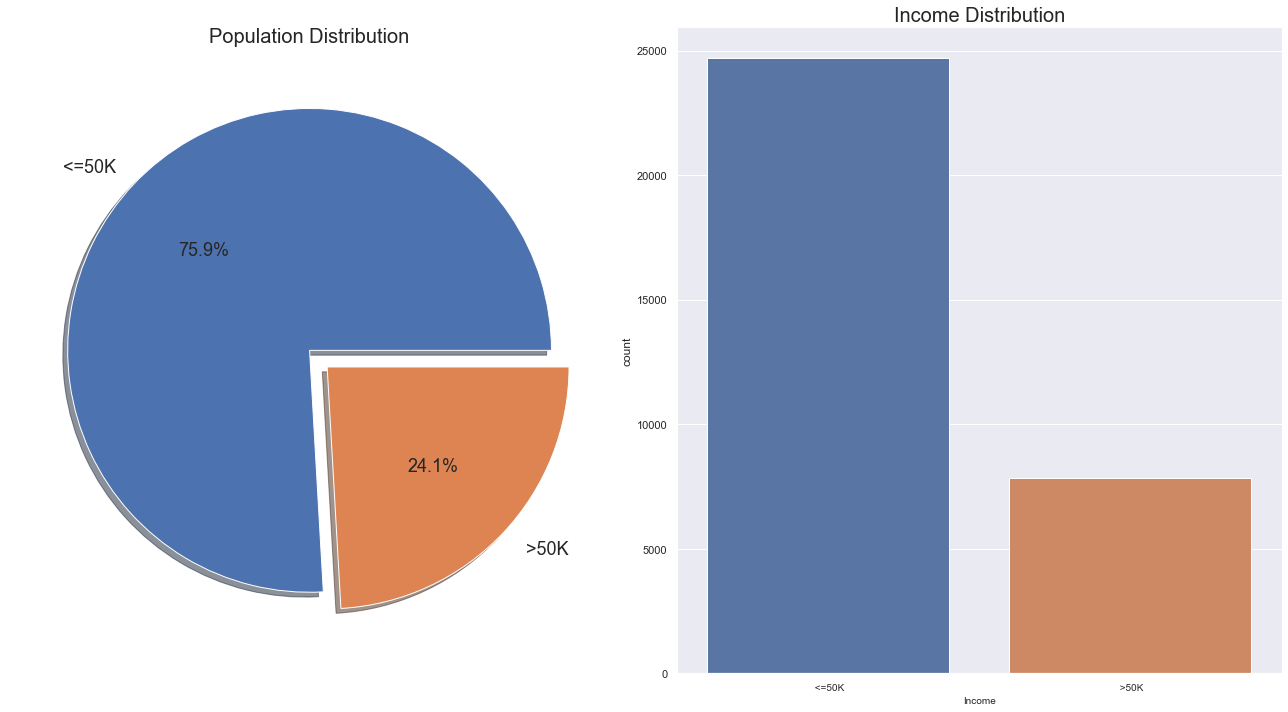

In [111]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={'fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('Income',data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=20)
ax[1].set_xlabel("Income",fontsize=10)
plt.xticks(fontsize=10)
plt.show()

75.9 % population (24697 peoples) have income less than 50K.

Target variable income is imbalanced.

### Exploration of Age

In [112]:
print('Minimum Age:', df['Age'].min(),'years')
print('Maximum Age:', df['Age'].max(),'years')
print('Average Age:', df['Age'].mean(),'years')

Minimum Age: 17 years
Maximum Age: 90 years
Average Age: 38.58553602163757 years


In [113]:
#  create new columns to classify people according different age gruop
def age_group(x):
    x = int(x)
    x = abs(x)
    if (18 < x < 31):
        return "19-30"
    if (30 < x < 41) :
        return '31-40'
    if (40 < x <51):
        return '41-50'
    if (50 < x < 61):
        return "51-60"
    if (60 < x < 71):
        return "61-70"
    else :
        return 'Greater Than 70'

In [114]:
#new  columns create 'age_group'
df['age_group']=df['Age'].apply(age_group)

In [115]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,19-30
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,19-30
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,31-40
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,51-60
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,19-30


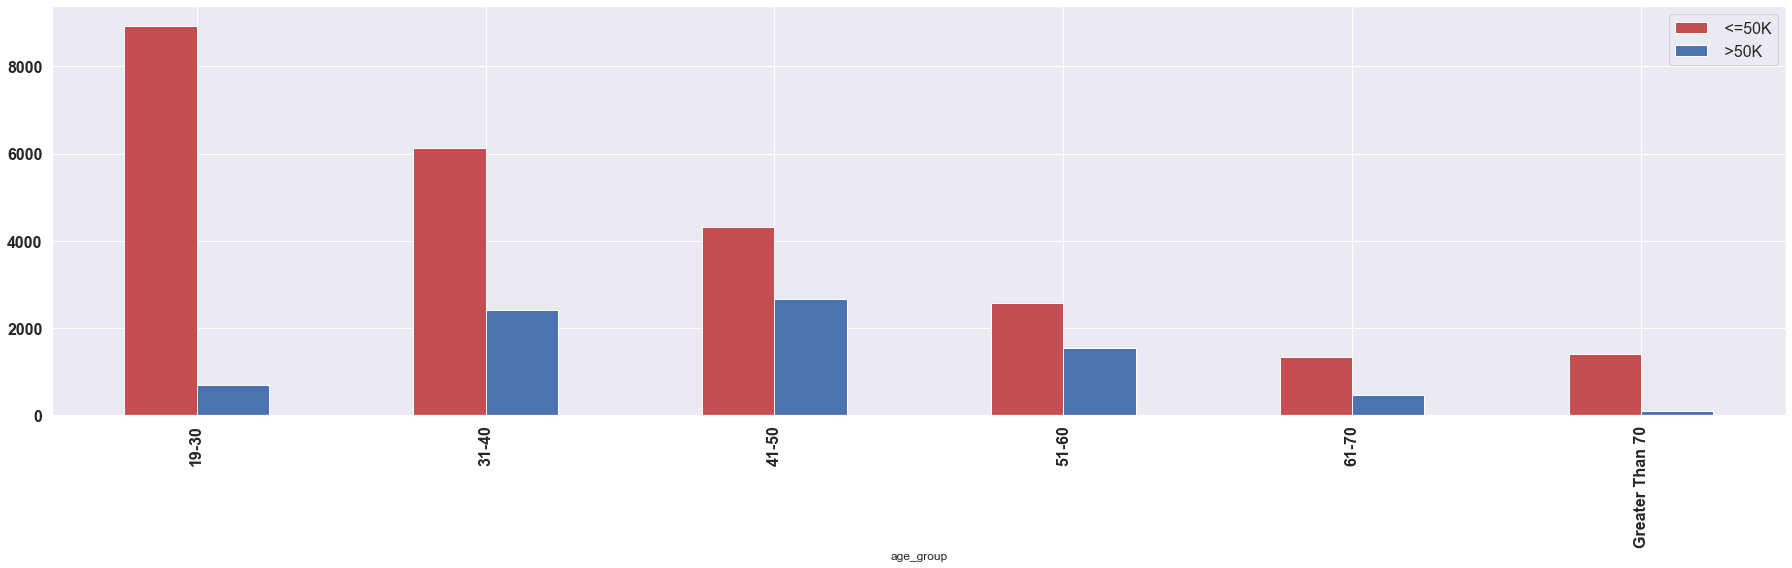

In [116]:
pd.crosstab(df.age_group,df.Income).plot(kind="bar",figsize=(25,8), color=['r','b'])
order_list = ['19-30','31-40','41-50','51-60','61-70','Greater Than 70']
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

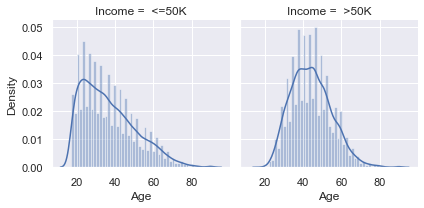

In [117]:
# Distribution of age with income categories
ax= sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

Almost 10 % people in age group of 19-30 earns more than 50 K dollars and this count drop even more in old peoples having age greater than 70.

Maximum people earning more than 50K dollors belong to age group 41-50 & 51-60.

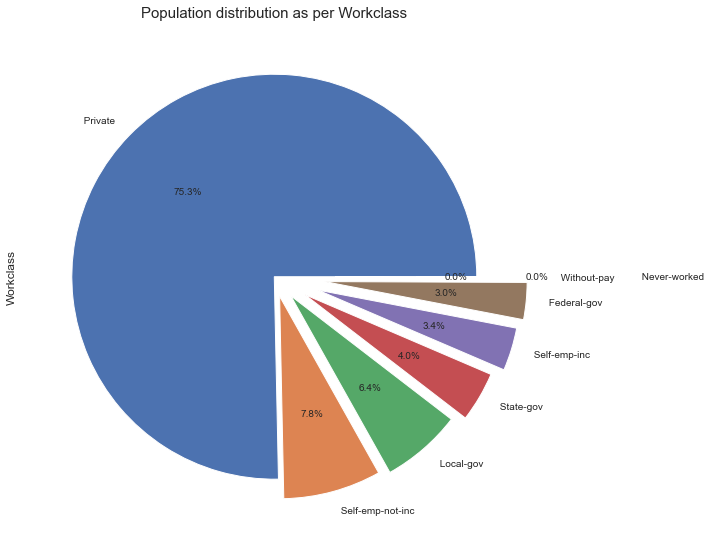

In [118]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(10,10))
df['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':10})
plt.title('Population distribution as per Workclass', fontsize=15)
plt.tight_layout()
plt.show()

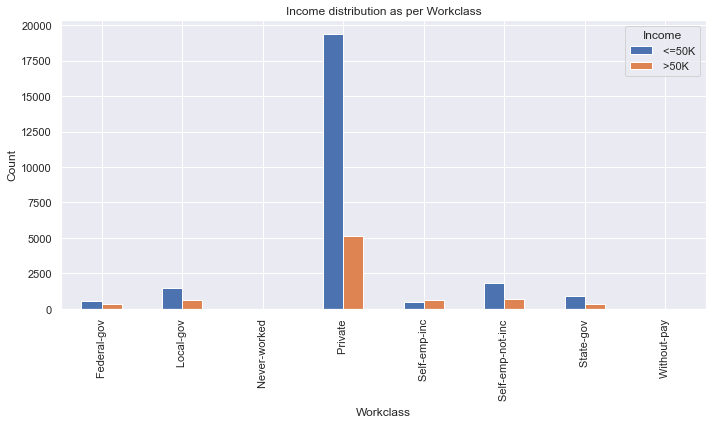

In [119]:
pd.crosstab(df.Workclass,df.Income).plot(kind="bar",figsize=(10,6))
plt.title('Income distribution as per Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()

In [120]:
pd.crosstab(df['Income'],df["Workclass"], margins=True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


75.3% people belongs to Private sector followed by Self Emplyoed not Incorporated with 7.8 %

Interseting observation comes with Self-Employed Incorporated category where the number of people who earn more than 50K dollars exceed those earning less than it !

Difference between private sector employees income where less than 25 % people earn more than 50K dollars an year.

Goverment Emplyoees have high wages compare to private

### Education Vs Income

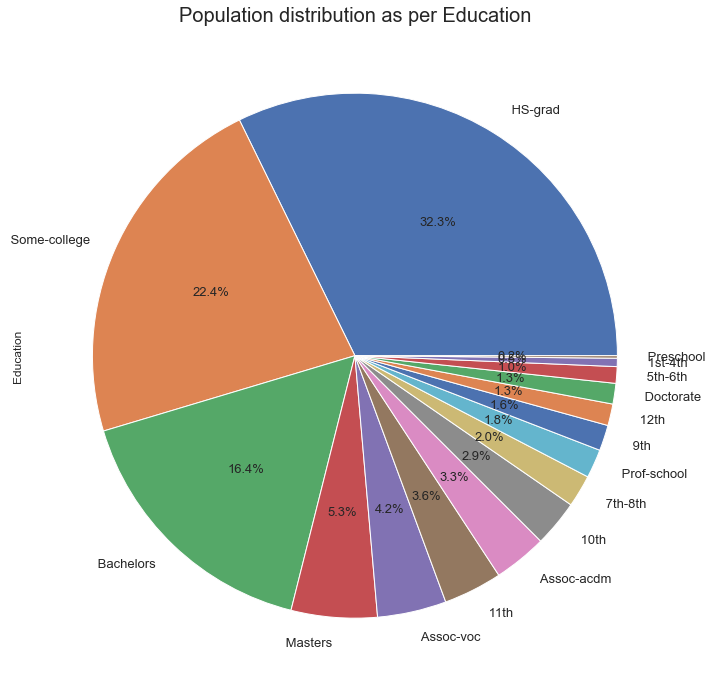

In [121]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(10,10))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13})
plt.title('Population distribution as per Education', fontsize=20)
plt.tight_layout()
plt.show()

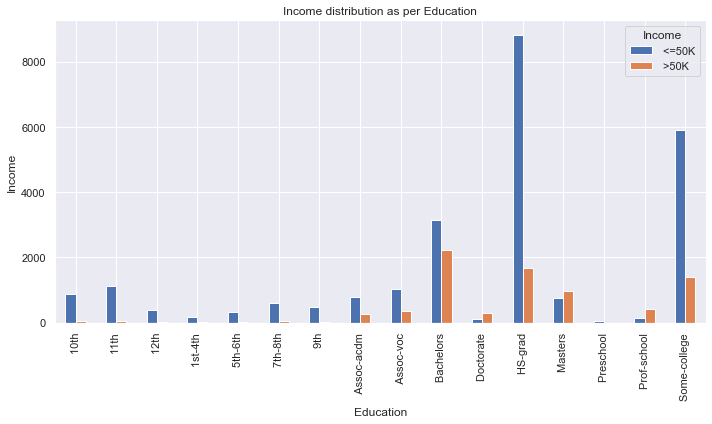

In [122]:
pd.crosstab(df.Education,df.Income).plot(kind="bar",figsize=(10,6))
plt.title('Income distribution as per Education')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

Out of all population 32.3% people with HS-Grad education which is most prevalent education level.

5.3 % people with masters and 1.3 % population is Doctorate degree holder. Highly educated & intellactual people belongs to this category.

There are very handful people who earn more than 50 K dollars having education below 12th level.

Maximum number of people who earn more than 50K dollars are Bachelors degree holder.



In [123]:
pd.crosstab(df['Education'],df["Workclass"], margins=True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


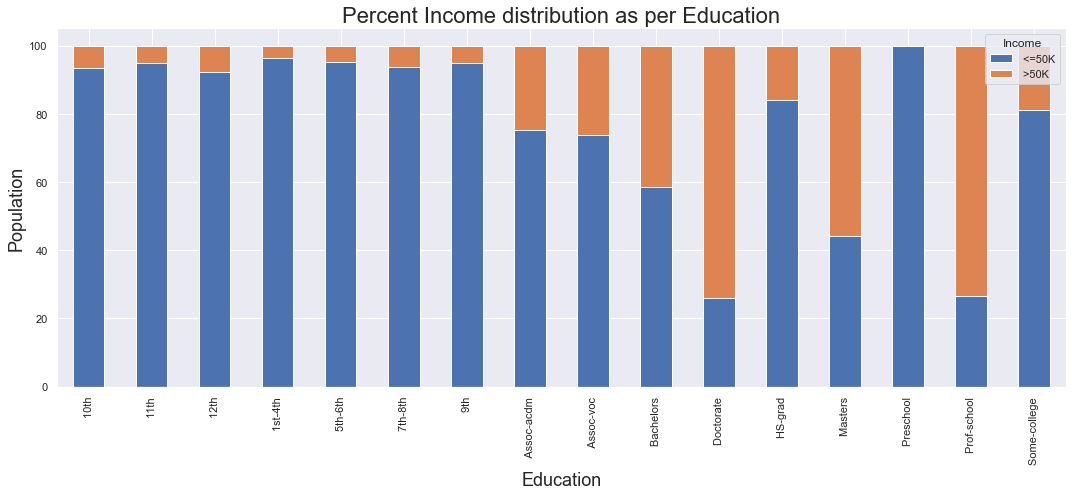

In [124]:
# Percentage Income distribution in terms of Education
table = pd.crosstab(df['Education'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Education', fontsize=22)
plt.xlabel('Education', fontsize=18)
plt.ylabel('Population', fontsize=18)
plt.show()

75% of Doctorate people earn more than 50K dollars an years, followed by Prof- school.

Highly earning people most of times comes with Masters or Doctorate education background.





### Impact of Marital Status on Income

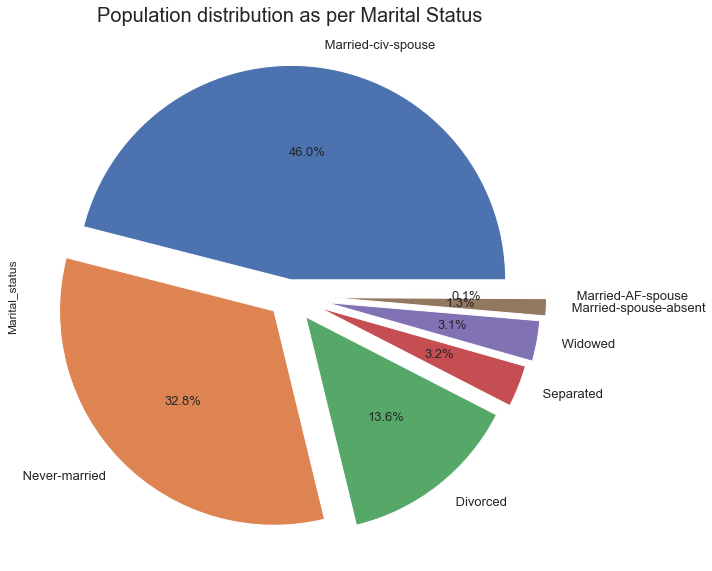

In [125]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(10,10))
df['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%', explode=[0.075,0.1,0.125,0.15,0.175,0.2,0.225],
                                             textprops ={'fontsize':13,})
plt.title('Population distribution as per Marital Status', fontsize=20)
plt.tight_layout()
plt.show()

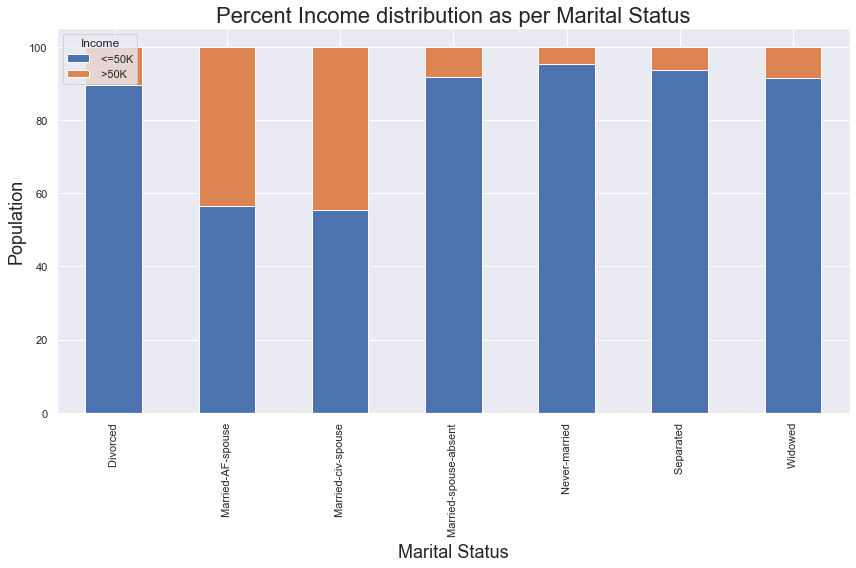

In [126]:
# Percentage Income distribution in terms of Education
table = pd.crosstab(df['Marital_status'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Marital Status', fontsize=22)
plt.xlabel('Marital Status', fontsize=18)
plt.ylabel('Population', fontsize=18)
plt.show()

In [127]:
pd.crosstab(df['Marital_status'],df["Income"])

Income,<=50K,>50K
Marital_status,,
Divorced,3978,463
Married-AF-spouse,13,10
Married-civ-spouse,8280,6690
Married-spouse-absent,384,34
Never-married,10175,491
Separated,959,66
Widowed,908,85


Married people are most like to earn more than 50K dollars an year.

### Occupation VS Income

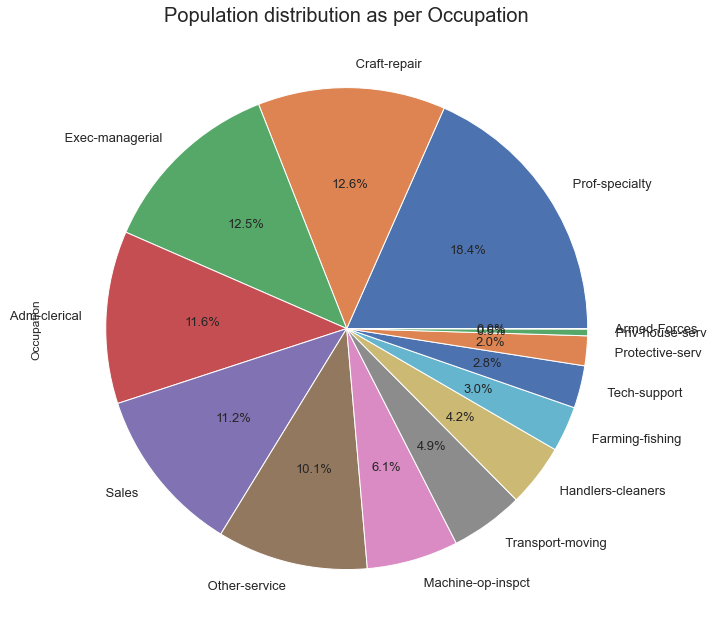

In [128]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(10,10))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13})
plt.title('Population distribution as per Occupation', fontsize=20)
plt.tight_layout()
plt.show()

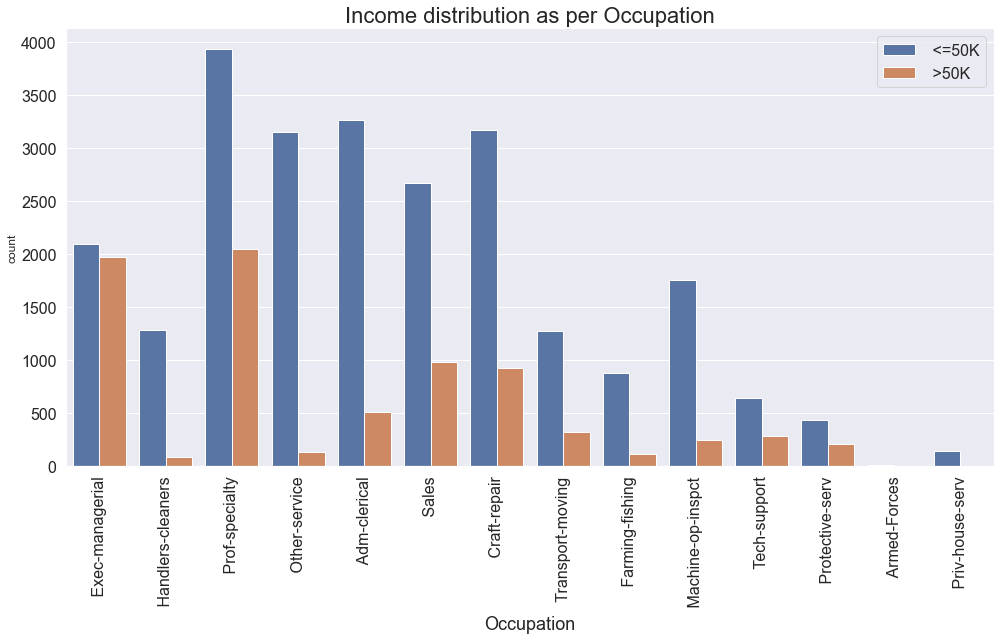

In [129]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Occupation'], hue=df['Income'])
plt.title('Income distribution as per Occupation', fontsize=22)
p.set_xlabel('Occupation',fontsize=18)
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

Exec-managerial role are equally likely to earn more than 50K dollars an year.

Around 25% of the people working in Sales earn more than 50K dollars an year.

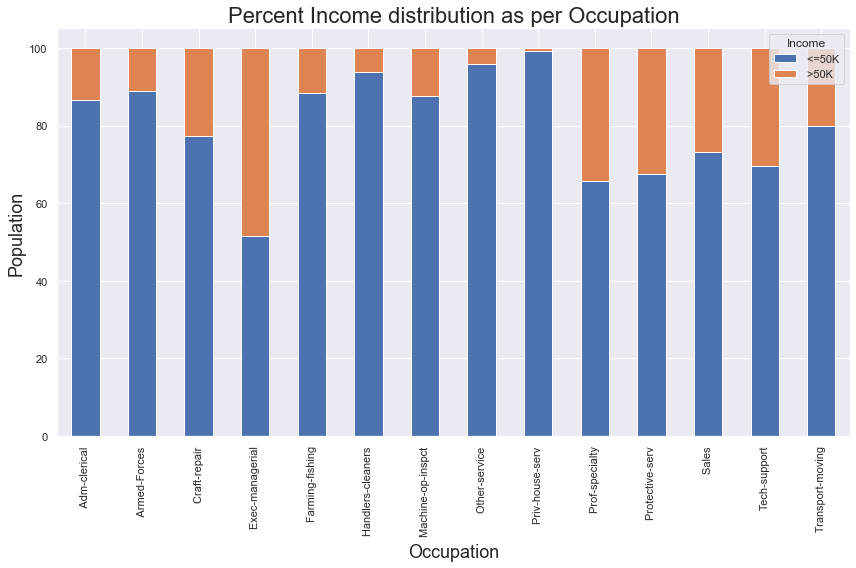

In [130]:
# Percentage Income distribution in terms of Education
table = pd.crosstab(df['Occupation'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Occupation', fontsize=22)
plt.xlabel('Occupation', fontsize=18)
plt.ylabel('Population', fontsize=18)
plt.show()

In [131]:
pd.crosstab(df['Occupation'],df["Income"], margins=True)

Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3260,507,3767
Armed-Forces,8,1,9
Craft-repair,3165,929,4094
Exec-managerial,2097,1968,4065
Farming-fishing,877,115,992
Handlers-cleaners,1283,86,1369
Machine-op-inspct,1751,249,2000
Other-service,3154,137,3291
Priv-house-serv,146,1,147


Prof-Speciality position with maximum 2049 peoples followed by Exec-managerial position with 1968 people leads chart for greater than 50K dollars an year.

There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year. - Minimum chances for Greater than 50K Club comes from Private House Service occupation where 1/147 chance of getting more than 50K dollars an year.

In [132]:
# These different occupation fit with respect to Work class through crosstab.
pd.crosstab(df['Occupation'],df["Workclass"], margins=True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Occupation,,,,,,,,,
Adm-clerical,317,283,0,2831,31,50,252,3,3767
Armed-Forces,9,0,0,0,0,0,0,0,9
Craft-repair,64,146,0,3191,106,530,56,1,4094
Exec-managerial,180,214,0,2690,400,392,189,0,4065
Farming-fishing,8,29,0,453,51,430,15,6,992
Handlers-cleaners,23,47,0,1272,2,15,9,1,1369
Machine-op-inspct,14,12,0,1911,13,36,13,1,2000
Other-service,35,193,0,2736,27,175,124,1,3291
Priv-house-serv,0,0,0,147,0,0,0,0,147


There are 7 peoples From Never Worked Category with High earning Profession of Prof-speciality.

Without pay workclass we find 6 peoples with Exec-Managerial

### Relationship VS Income

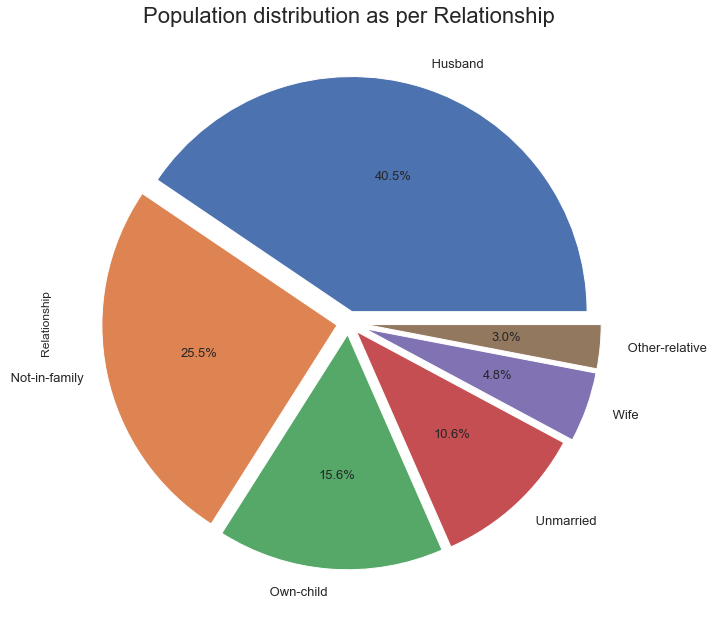

In [133]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(10,10))
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075,0.075],
                                           textprops ={'fontsize':13})
plt.title('Population distribution as per Relationship', fontsize=22)
plt.tight_layout()
plt.show()

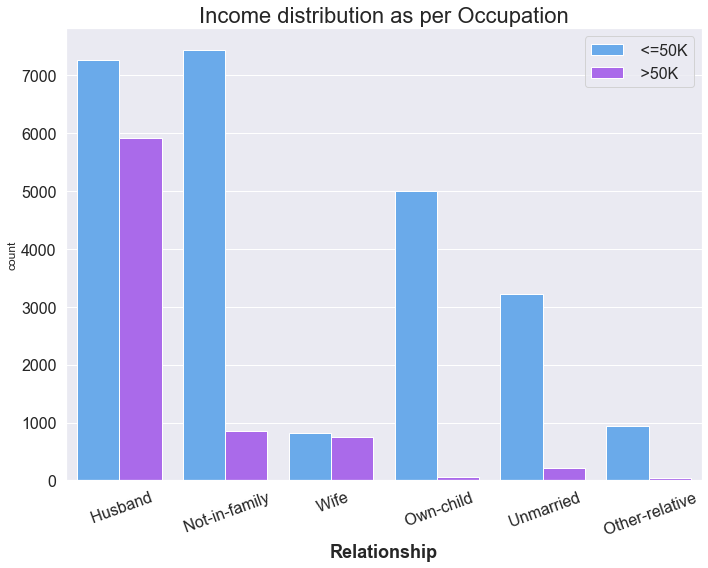

In [134]:
plt.figure(figsize=(10,8))
p = sns.countplot(df['Relationship'], hue=df['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22)
p.set_xlabel('Relationship',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

Wives are equally likely to earn more than 50K dollars an year.

Less Unmarried people earning more than 50K dollars an year.

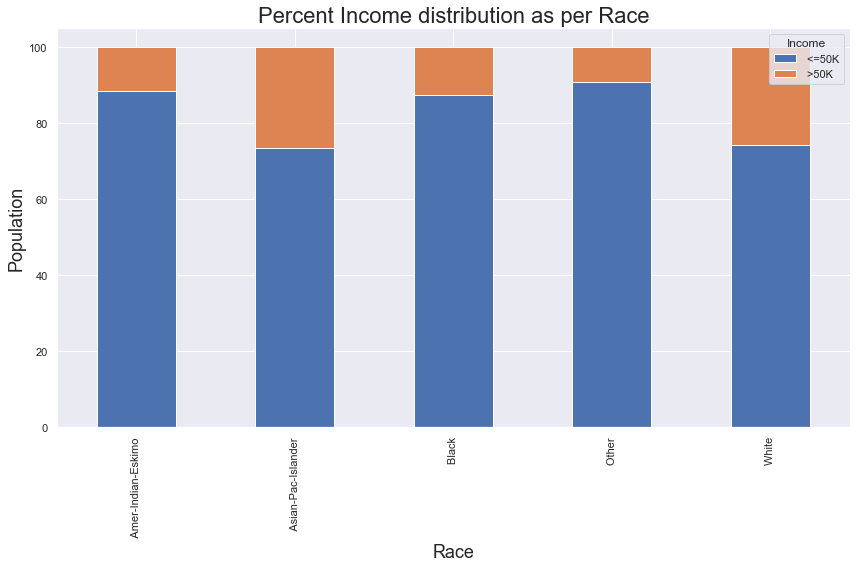

In [135]:
# Income distribution in terms of Education
table = pd.crosstab(df['Race'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Race', fontsize=22)
plt.xlabel('Race', fontsize=18)
plt.ylabel('Population', fontsize=18)
plt.show()

85.4 % peoples are whites followed by black community with 9.6%.

Maximum peoples in Greater than 50K Club are White.

### Sex Vs Income

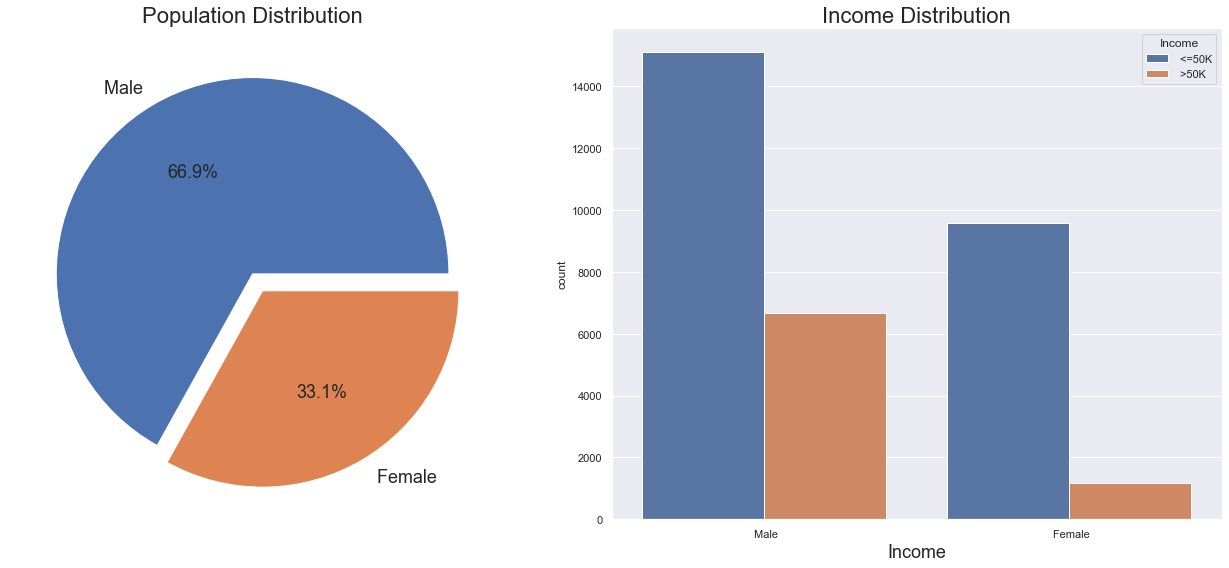

In [136]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={'fontsize':18}, ax=ax[0])
ax[0].set_title('Population Distribution', fontsize=22)
ax[0].set_ylabel('')
sns.countplot('Sex',hue=df['Income'] ,data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22)
ax[1].set_xlabel("Income",fontsize=18)
plt.show()

There is gap between male and female earnings.

10% Women in Greater Than 50K Dollar. 

33% of Men earning more than 50K dollars an year.

In [137]:
# which profession these women involved in .
pd.crosstab(df['Occupation'],[df.Sex,df.Income], margins=True)

Sex                 Female         Male          All
Income               <=50K  >50K  <=50K  >50K       
Occupation                                          
 Adm-clerical         2323   212    937   295   3767
 Armed-Forces            0     0      8     1      9
 Craft-repair          202    20   2963   909   4094
 Exec-managerial       879   280   1218  1688   4065
 Farming-fishing        63     2    814   113    992
 Handlers-cleaners     160     4   1123    82   1369
 Machine-op-inspct     529    20   1222   229   2000
 Other-service        1748    51   1406    86   3291
 Priv-house-serv       138     1      8     0    147
 Prof-specialty       1917   437   2013  1612   5979
 Protective-serv        66    10    372   201    649
 Sales                1175    88   1492   895   3650
 Tech-support          302    45    342   238    927
 Transport-moving       81     9   1196   311   1597
All                   9583  1179  15114  6660  32536

In all population 33 % are womens. 

Most of females work in Adm-clerical,Other-service,Prof-specialty.

Max men work in Prof-Specialty.

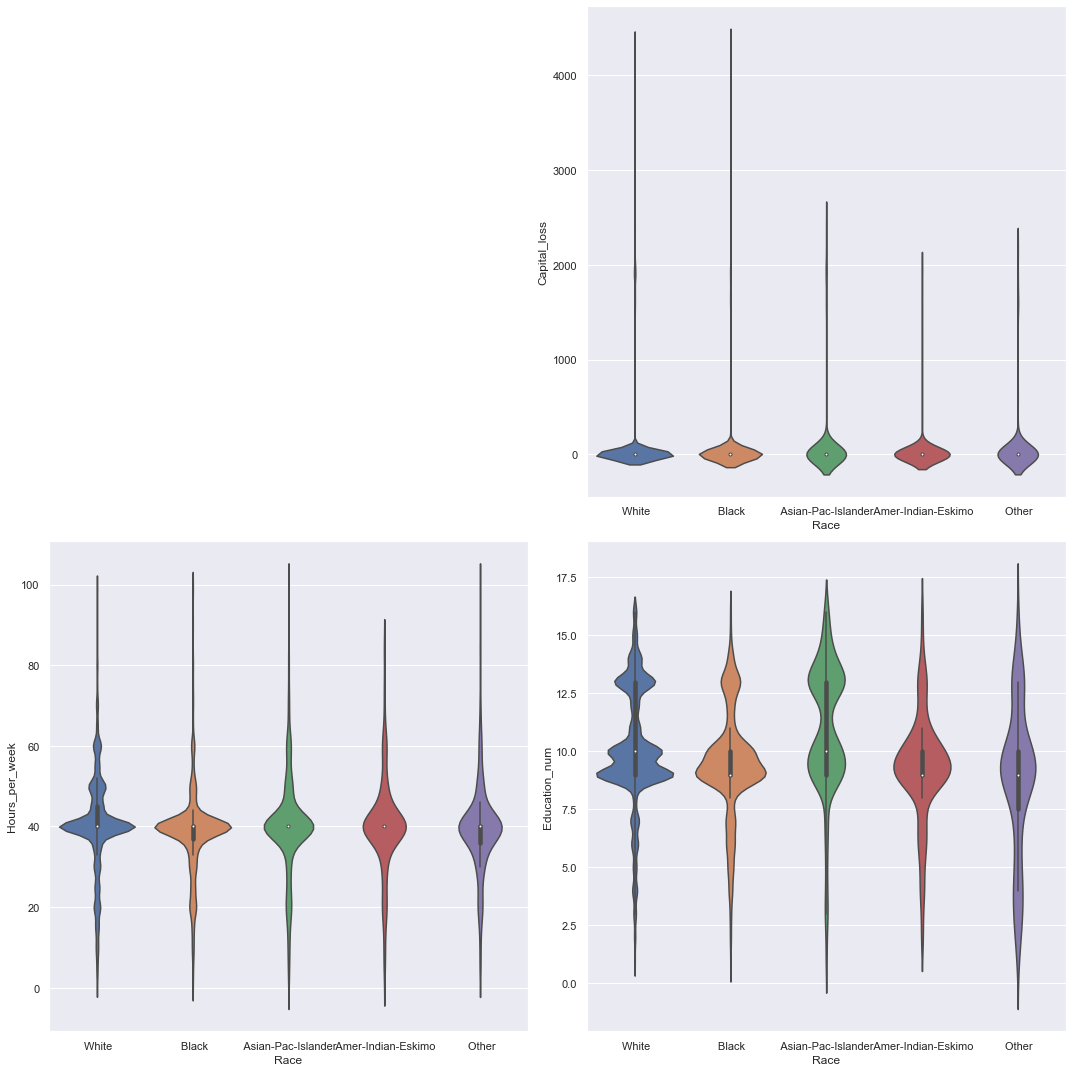

In [138]:
#  Violin plot show how capital gain, loss, hours per week and education vary with the race of the people
plt.rcParams['figure.figsize'] = [15,15]
sns.violinplot(x = df['Race'], y = df['Capital_gain'], data = df);
plt.subplot(2,2,2)
sns.violinplot(x = df['Race'], y = df['Capital_loss'], data = df);
plt.subplot(2,2,3)
sns.violinplot(x = df['Race'], y = df['Hours_per_week'], data = df);
plt.subplot(2,2,4)
sns.violinplot(x = df['Race'], y = df['Education_num'], data = df);

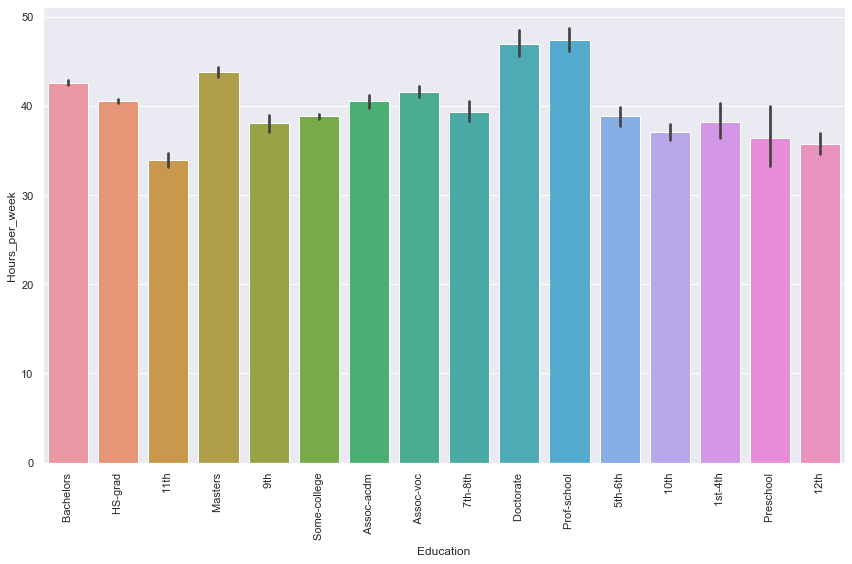

In [139]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df['Education'], y = df['Hours_per_week'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=90)
plt.show()

In [140]:
import plotly.express as px
plt.figure(figsize=(15,7))
inc = px.scatter(df,x= 'Native_country', y = 'Education_num',color = 'Income')
inc.show()

<Figure size 1080x504 with 0 Axes>

In [141]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,19-30
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,31-40


# Encoding categorical data

In [142]:
 # Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,51-60
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,19-30
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,31-40


# Feature  Engineering

### 1. Outliers Detection

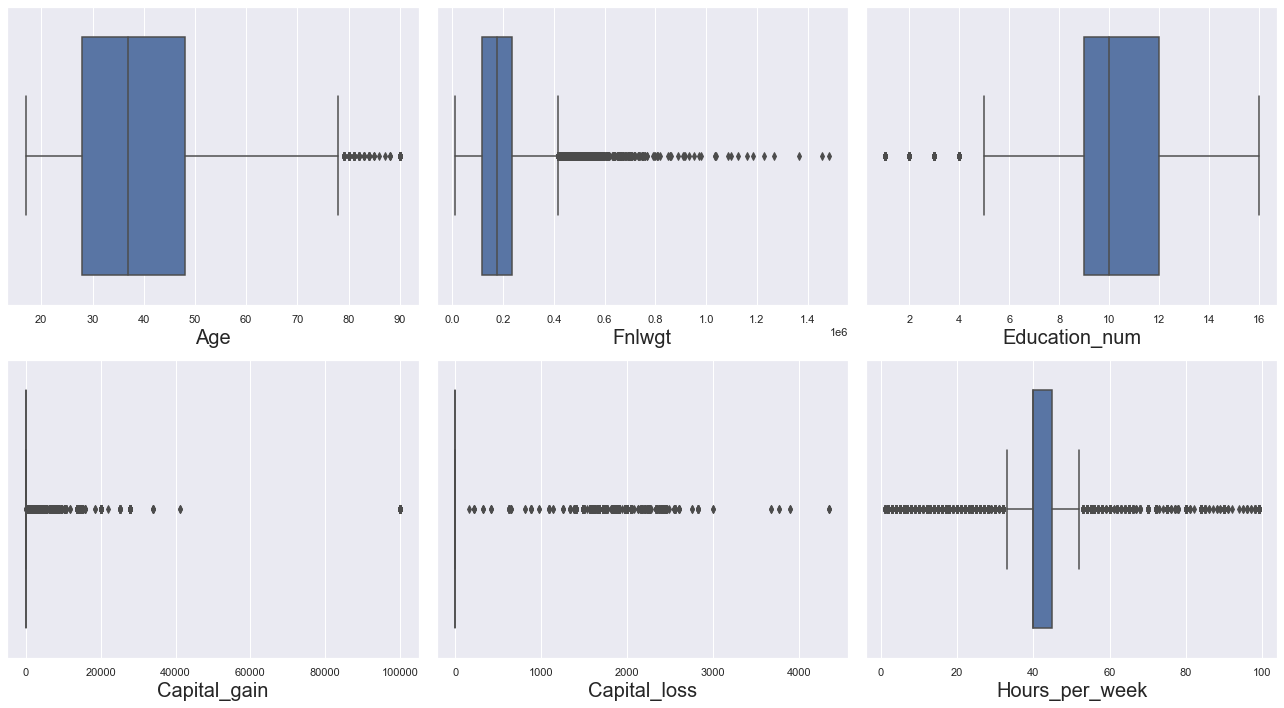

In [143]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [144]:
df.drop(["Fnlwgt","Education"], axis=1, inplace=True)

In [147]:
df.drop(["age_group"], axis=1, inplace=True)

In [148]:
df

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,2,3,0,4,1,0,0,13,38,0
1,38,3,9,0,5,1,4,1,0,0,40,38,0
2,53,3,7,2,5,0,2,1,0,0,40,38,0
3,28,3,13,2,9,5,2,0,0,0,40,4,0
4,37,3,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,9,4,0,3,4,1,0,0,20,38,0


### Outliers removal using Zscore method

In [149]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (32536, 13)
Shape of the dataframe after removing outliers:  (28061, 13)
Percentage of data loss post outlier removal:  13.753995574133269


losing  13.75 % of data.

Cant lose this amount of data.

### Skewness

In [151]:
df.skew()

Age                0.487918
Workclass          0.080746
Education_num     -0.147601
Marital_status    -0.046623
Occupation         0.015247
Relationship       0.752334
Race              -2.549199
Sex               -0.689977
Capital_gain       4.924729
Capital_loss      29.669292
Hours_per_week    -0.359365
Native_country    -5.348195
Income             1.322011
dtype: float64

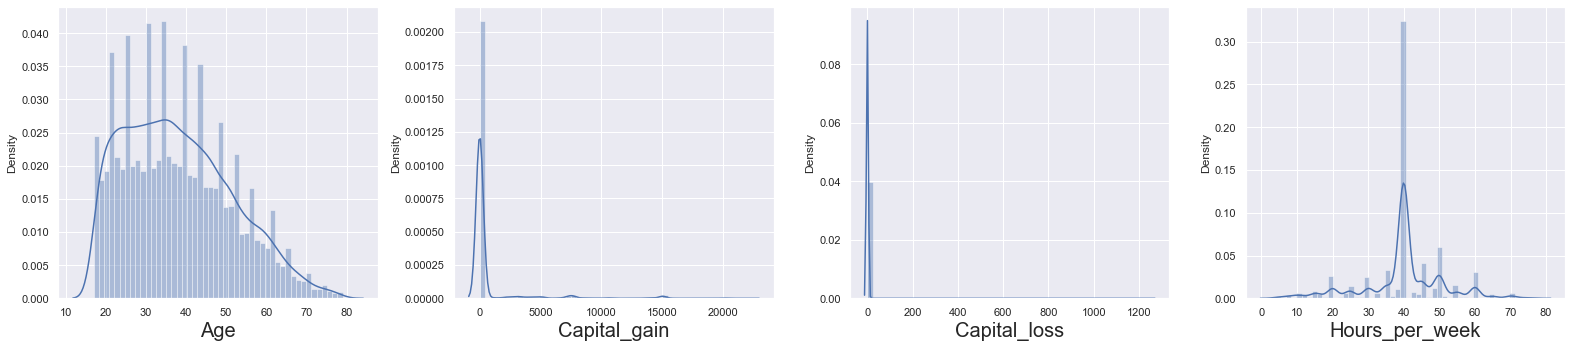

In [152]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in df[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Capital_gain and Capital_loss are numeric variable with lot of zero and high number. So skewness exist in them. There is no point in transforming it because at end data will be skewed.

### Corrleation

In [157]:
df.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.029674,0.045622,-0.286328,-0.001610,-0.270591,0.021292,0.089469,0.131998,0.023459,0.090783,0.037494,0.241844
Workclass,0.029674,1.000000,-0.002200,-0.015623,0.008779,-0.057823,0.067532,0.069617,0.011083,-0.010613,0.028104,0.001938,-0.007699
Education_num,0.045622,-0.002200,1.000000,-0.058587,0.073142,-0.092447,0.080766,0.003688,0.157858,0.007348,0.156303,0.149688,0.320271
Marital_status,-0.286328,-0.015623,-0.058587,1.000000,0.036477,0.183248,-0.084558,-0.125361,-0.069601,-0.016396,-0.196053,-0.032575,-0.194146
Occupation,-0.001610,0.008779,0.073142,0.036477,1.000000,-0.038735,0.000613,0.051055,0.009446,-0.004779,-0.022194,0.018069,0.030664
Relationship,-0.270591,-0.057823,-0.092447,0.183248,-0.038735,1.000000,-0.146432,-0.577195,-0.089095,0.030105,-0.261919,-0.011274,-0.248263
Race,0.021292,0.067532,0.080766,-0.084558,0.000613,-0.146432,1.000000,0.122731,0.031333,0.000186,0.055486,0.018660,0.094756
Sex,0.089469,0.069617,0.003688,-0.125361,0.051055,-0.577195,0.122731,1.000000,0.069539,-0.027323,0.236168,-0.011189,0.211792
Capital_gain,0.131998,0.011083,0.157858,-0.069601,0.009446,-0.089095,0.031333,0.069539,1.000000,-0.009077,0.098705,0.019185,0.343487
Capital_loss,0.023459,-0.010613,0.007348,-0.016396,-0.004779,0.030105,0.000186,-0.027323,-0.009077,1.000000,-0.003440,0.002925,-0.016465


<AxesSubplot:>

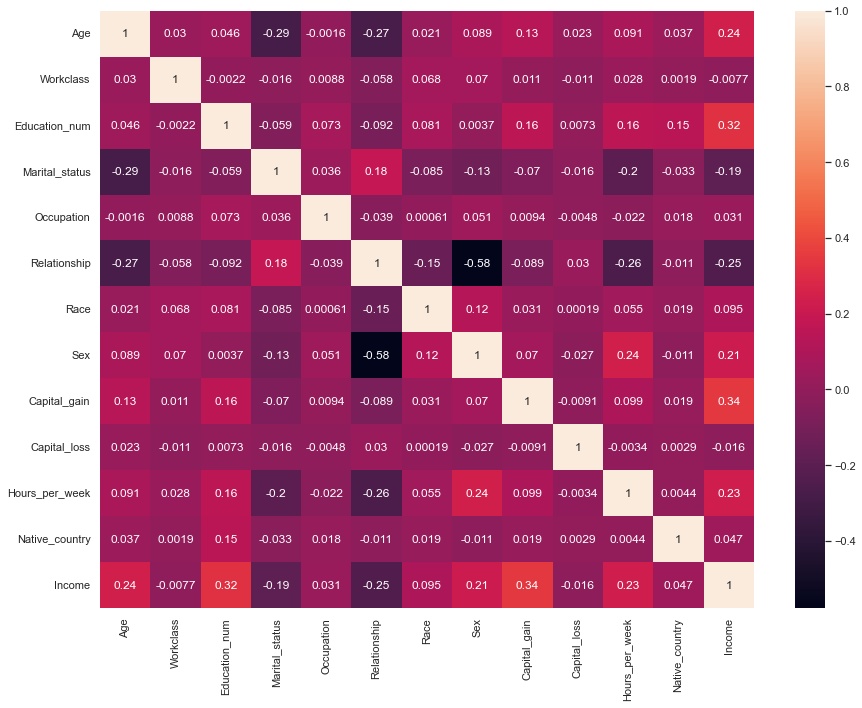

In [158]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)

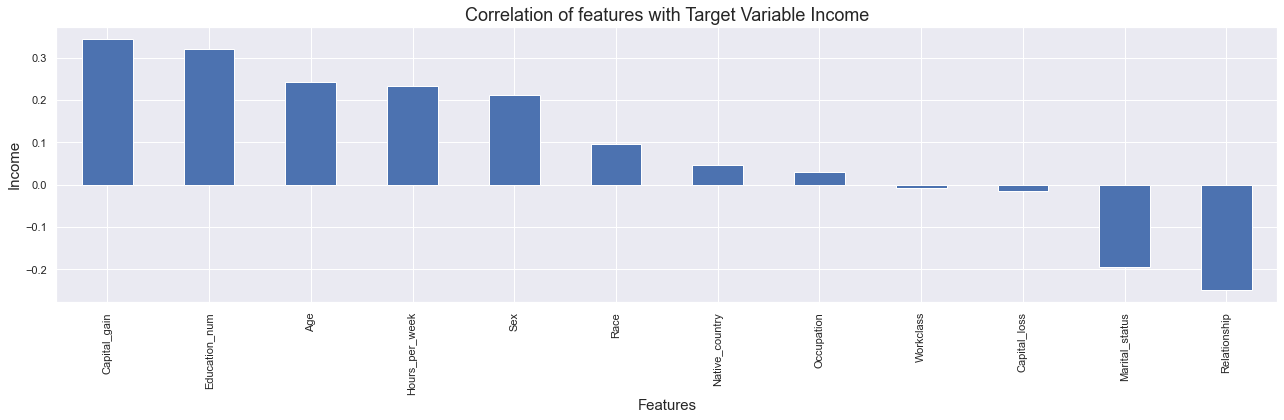

In [160]:
plt.figure(figsize = (18,6))
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Income',fontsize = 18)
plt.show()

Capital loss and workclass,occupation, native country, race are correlated with target variable with less than 10% correlation.

Between input features maximum correlation of -0.557 exist between sex and relationship.

Capital gain is highly correlated with target variable.

### Checking Multicollinearity

In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,10.452897,Age
1,8.807425,Workclass
2,21.287850,Education_num
3,4.358505,Marital_status
4,3.357557,Occupation
5,2.937270,Relationship
6,36.291318,Race
7,4.566872,Sex
8,1.209589,Capital_gain
9,1.004295,Capital_loss


Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.



### Balanceing Imbalanced

In [164]:
df.Income.value_counts()

0    21767
1     6294
Name: Income, dtype: int64

In [165]:
# Balancing using SMOTE
from imblearn.over_sampling import SMOTE
X = df.drop(['Income'], axis =1)
Y = df['Income']

In [166]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [167]:
Y.value_counts()

0    21767
1    21767
Name: Income, dtype: int64

### Standard Scaling

In [168]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

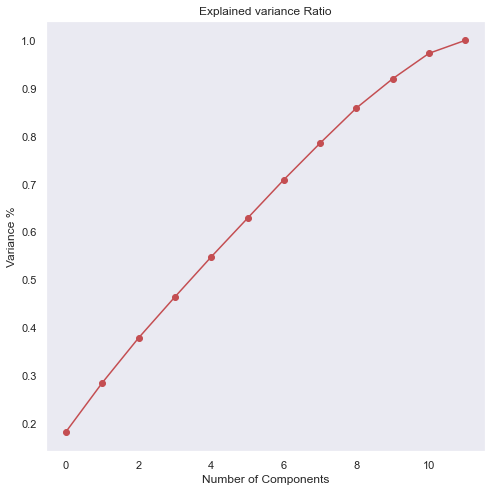

In [170]:
#plot the graph to find the principal components
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(7,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

9 principal components attribute for 90% of variation in the data

In [171]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [172]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

# Model Building

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

### Random state

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7786838176180085 on Random_state 966


In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=966, test_size=.2)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression Evaluation')
print('\n')
print('Accuracy Score of Logistics Regression :', accuracy_score(Y_test, y_pred)*100)
print('\n')
print('Confusion matrix of Logistics Regression :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of Logistics Regression',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 77.86838176180085


Confusion matrix of Logistics Regression : [[3316 1027]
 [ 900 3464]]


classification Report of Logistics Regression               precision    recall  f1-score   support

           0       0.79      0.76      0.77      4343
           1       0.77      0.79      0.78      4364

    accuracy                           0.78      8707
   macro avg       0.78      0.78      0.78      8707
weighted avg       0.78      0.78      0.78      8707



#### DecisionTreeClassifier

In [184]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=966, test_size=.2)
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)
y_pred=DT.predict(X_test)
print('DecisionTreeClassifier Evaluation')
print('\n')
print('Accuracy Score of DecisionTreeClassifier :', accuracy_score(Y_test, y_pred)*100)
print('\n')
print('Confusion matrix of DecisionTreeClassifier :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of DecisionTreeClassifier',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 81.60101068106121


Confusion matrix of DecisionTreeClassifier : [[3478  865]
 [ 737 3627]]


classification Report of DecisionTreeClassifier               precision    recall  f1-score   support

           0       0.83      0.80      0.81      4343
           1       0.81      0.83      0.82      4364

    accuracy                           0.82      8707
   macro avg       0.82      0.82      0.82      8707
weighted avg       0.82      0.82      0.82      8707



#### KNeighborsClassifier

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=966, test_size=.2)
KN= KNeighborsClassifier(n_neighbors = 3)
KN.fit(X_train,Y_train)
y_pred=KN.predict(X_test)
print('KNeighborsClassifier Evaluation')
print('\n')
print('Accuracy Score of KNeighborsClassifier :', accuracy_score(Y_test, y_pred)*100)
print('\n')
print('Confusion matrix of KNeighborsClassifier :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of KNeighborsClassifier',classification_report(Y_test, y_pred))

KNeighborsClassifier Evaluation


Accuracy Score of KNeighborsClassifier : 85.25324451590674


Confusion matrix of KNeighborsClassifier : [[3549  794]
 [ 490 3874]]


classification Report of KNeighborsClassifier               precision    recall  f1-score   support

           0       0.88      0.82      0.85      4343
           1       0.83      0.89      0.86      4364

    accuracy                           0.85      8707
   macro avg       0.85      0.85      0.85      8707
weighted avg       0.85      0.85      0.85      8707



#### RandomForestClassifier

In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=966, test_size=.2)
RF=  RandomForestClassifier()
RF.fit(X_train,Y_train)
y_pred=RF.predict(X_test)
print('RandomForestClassifier Evaluation')
print('\n')
print('Accuracy Score of RandomForestClassifier :', accuracy_score(Y_test, y_pred)*100)
print('\n')
print('Confusion matrix of RandomForestClassifier :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of RandomForestClassifier',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 86.06868037211439


Confusion matrix of RandomForestClassifier : [[3635  708]
 [ 505 3859]]


classification Report of RandomForestClassifier               precision    recall  f1-score   support

           0       0.88      0.84      0.86      4343
           1       0.84      0.88      0.86      4364

    accuracy                           0.86      8707
   macro avg       0.86      0.86      0.86      8707
weighted avg       0.86      0.86      0.86      8707



#### GradientBoostingClassifier

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=966, test_size=.2)
GB=  GradientBoostingClassifier()
GB.fit(X_train,Y_train)
y_pred=GB.predict(X_test)
print('GradientBoostingClassifier Evaluation')
print('\n')
print('Accuracy Score of GradientBoostingClassifier :', accuracy_score(Y_test, y_pred)*100)
print('\n')
print('Confusion matrix of GradientBoostingClassifier :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of GradientBoostingClassifier',classification_report(Y_test, y_pred))

GradientBoostingClassifier Evaluation


Accuracy Score of GradientBoostingClassifier : 81.73883082577237


Confusion matrix of GradientBoostingClassifier : [[3377  966]
 [ 624 3740]]


classification Report of GradientBoostingClassifier               precision    recall  f1-score   support

           0       0.84      0.78      0.81      4343
           1       0.79      0.86      0.82      4364

    accuracy                           0.82      8707
   macro avg       0.82      0.82      0.82      8707
weighted avg       0.82      0.82      0.82      8707



## CrossValidation 

In [192]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        GradientBoostingClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('Cross Validation Score:', m)
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('*'*50)



Cross Validation Score: LogisticRegression()
Score : [0.7600781  0.77351556 0.7646721  0.77213736 0.76946933]
Mean Score : 0.7679744910837601
Std deviation : 0.004970438427396093


**************************************************


Cross Validation Score: DecisionTreeClassifier()
Score : [0.79683014 0.813024   0.82646147 0.83863558 0.83643464]
Mean Score : 0.8222771662947691
Std deviation : 0.01561225526223812


**************************************************


Cross Validation Score: KNeighborsClassifier(n_neighbors=3)
Score : [0.82140806 0.84713449 0.8577007  0.86551051 0.86239375]
Mean Score : 0.8508295025554482
Std deviation : 0.015973424280527875


**************************************************


Cross Validation Score: RandomForestClassifier()
Score : [0.83243367 0.85391065 0.86895601 0.87102331 0.87388008]
Mean Score : 0.8600407460682831
Std deviation : 0.01543602648234798


**************************************************


Cross Validation Score: GradientBoostingC

RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score.

# Hyper Parameter Tuning

In [193]:
from sklearn.model_selection import GridSearchCV

In [198]:
param = {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]
             }

In [199]:
GCV = GridSearchCV(RandomForestClassifier(),param,cv=5,n_jobs = -1,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=5)

In [196]:
 GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 60}

In [197]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators=60, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test, y_pred)*100)

Accuracy Score : 86.17204548064775


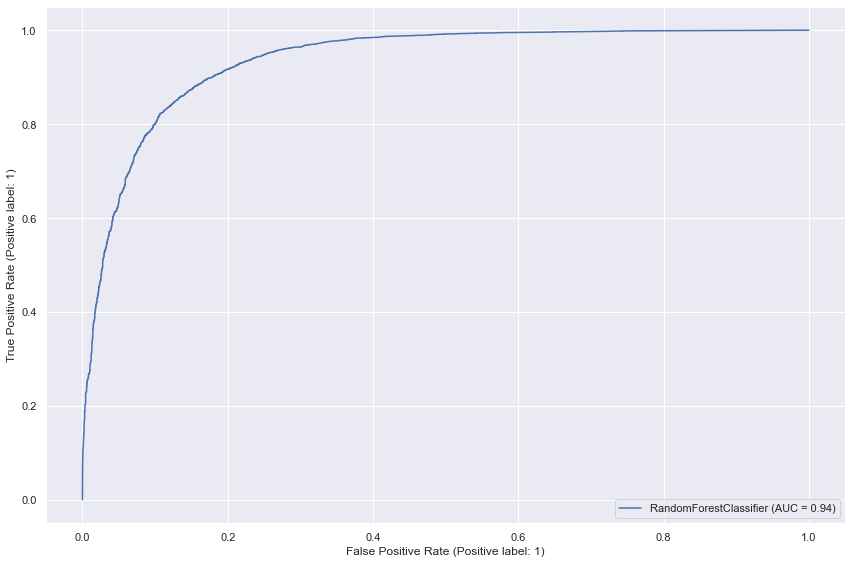

<Figure size 360x360 with 0 Axes>

Auc Score : 0.8616337794438537


In [206]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.figure(figsize=(5,5))
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('Auc Score :',auc_score)

# Saving model

In [207]:
import joblib
joblib.dump(Final_mod,'Census_Income.pkl')

['Census_Income.pkl']